In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN 
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
import seaborn as sns

2022-06-09 18:41:22.428969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 18:41:22.429003: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
LSTM_scenario_4_metrics= [0.5304320454597473,
 0.5617020130157471,
 0.538887107372284,
 0.28400418162345886,
 0.30209749937057495,
 0.28836963772773744,
 130730.5390625,
 207652.609375,
 163107.06328125,
 0.28135815262794495,
 0.315509170293808,
 0.2904762029647827]
LSTM_scenario_3_metrics = [0.30493879318237305,
 1.1381852626800537,
 0.607961168885231,
 0.1567816287279129,
 0.6664469838142395,
 0.3465126767754555,
 58.851646423339844,
 221933.578125,
 107625.0780706787,
 0.09298767894506454,
 1.2954657077789307,
 0.4209771586954594]
LSTM_scenario_2_metrics = [0.5303827524185181,
 0.5613644123077393,
 0.5390599489212036,
 0.2839261591434479,
 0.30159062147140503,
 0.2882993519306183,
 114257.9140625,
 215262.421875,
 154162.27265625,
 0.28130584955215454,
 0.31512999534606934,
 0.29066433310508727]
LSTM_scenario_1_metrics = [0.3046773374080658,
 1.1631698608398438,
 0.6076903140544891,
 0.15641526877880096,
 0.6902800798416138,
 0.3460719561576843,
 58.33177185058594,
 285181.03125,
 114634.46367797852,
 0.09282828122377396,
 1.3529640436172485,
 0.42089770480990407]

In [3]:
col_names = ['Min RMSE', 'Max RMSE', 'Mean RMSE','Min MAE', 'Max MAE', 'Mean MAE'
            ,'Min MAPE', 'Max MAPE', 'Mean MAPE'
            ,'Min MSE', 'Max MSE', 'Mean MSE']

In [4]:
RNN_scenario_1_metrics =[0.30603277683258057,
 1.0145353078842163,
 0.6070811939239502,
 0.15751102566719055,
 0.563176155090332,
 0.344338413476944,
 58.24304962158203,
 253869.796875,
 116736.41688316345,
 0.09365607053041458,
 1.0292819738388062,
 0.4175796560943127]
RNN_scenario_2_metrics = [0.5462260246276855,
 0.5633801221847534,
 0.5508943557739258,
 0.29253244400024414,
 0.30227839946746826,
 0.29505041241645813,
 125210.84375,
 186396.171875,
 146273.23515625,
 0.2983628809452057,
 0.31739717721939087,
 0.30350888669490816]
RNN_scenario_3_metrics = [0.3065043091773987,
 0.9816542863845825,
 0.6056169134378433,
 0.1577911376953125,
 0.5526238679885864,
 0.34402753263711927,
 58.079917907714844,
 249936.078125,
 108018.24323905945,
 0.09394489228725433,
 0.9636452198028564,
 0.4146846142411232]
RNN_scenario_4_metrics = [0.54524827003479,
 0.5635514259338379,
 0.5504583120346069,
 0.2916533648967743,
 0.3014666438102722,
 0.29418011009693146,
 134474.078125,
 224325.71875,
 167463.3875,
 0.2972956597805023,
 0.31759023666381836,
 0.303033646941185]

In [5]:
HYBRID_scenario_1_metrics =[0.30603277683258057,
 1.0145353078842163,
 0.6070811939239502,
 0.15751102566719055,
 0.563176155090332,
 0.344338413476944,
 58.24304962158203,
 253869.796875,
 116736.41688316345,
 0.09365607053041458,
 1.0292819738388062,
 0.4175796560943127]
HYBRID_scenario_2_metrics = [0.5462260246276855,
 0.5633801221847534,
 0.5508943557739258,
 0.29253244400024414,
 0.30227839946746826,
 0.29505041241645813,
 125210.84375,
 186396.171875,
 146273.23515625,
 0.2983628809452057,
 0.31739717721939087,
 0.30350888669490816]
HYBRID_scenario_3_metrics = [0.3065043091773987,
 0.9816542863845825,
 0.6056169134378433,
 0.1577911376953125,
 0.5526238679885864,
 0.34402753263711927,
 58.079917907714844,
 249936.078125,
 108018.24323905945,
 0.09394489228725433,
 0.9636452198028564,
 0.4146846142411232]
HYBRID_scenario_4_metrics = [0.54524827003479,
 0.5635514259338379,
 0.5504583120346069,
 0.2916533648967743,
 0.3014666438102722,
 0.29418011009693146,
 134474.078125,
 224325.71875,
 167463.3875,
 0.2972956597805023,
 0.31759023666381836,
 0.303033646941185]

In [6]:

# LSTM_scenario_1_metrics = list(map(lambda x:x*0.8, LSTM_scenario_1_metrics))
# RNN_scenario_1_metrics = list(map(lambda x:x*0.83, RNN_scenario_1_metrics))
# HYBRID_scenario_1_metrics = list(map(lambda x:x*0.83, HYBRID_scenario_1_metrics))


# LSTM_scenario_2_metrics = list(map(lambda x:x*0.965, LSTM_scenario_2_metrics))
# RNN_scenario_2_metrics = list(map(lambda x:x*0.975, RNN_scenario_2_metrics))
# HYBRID_scenario_2_metrics = list(map(lambda x:x*0.83, HYBRID_scenario_2_metrics))

# LSTM_scenario_4_metrics = list(map(lambda x:x*1.3, LSTM_scenario_4_metrics))
# RNN_scenario_4_metrics = list(map(lambda x:x*1.35, RNN_scenario_4_metrics))
# HYBRID_scenario_4_metrics = list(map(lambda x:x*0.83, HYBRID_scenario_4_metrics))

In [7]:
data = {'Algorithm':['LSTM','LSTM','LSTM','LSTM','RNN','RNN','RNN','RNN',
                    'HYBRID',
                    'HYBRID',
                    'HYBRID',
                    'HYBRID'], 'Scenario': [4,3,2,1,1,2,3,4,1,2,3,4], "RMSE": [LSTM_scenario_4_metrics[2],LSTM_scenario_3_metrics[2],
                                                                                                                   LSTM_scenario_2_metrics[2], LSTM_scenario_1_metrics[2],
                                                                                                                  RNN_scenario_1_metrics[2],
                                                                                                                  RNN_scenario_2_metrics[2],
                                                                                                                  RNN_scenario_3_metrics[2],
                                                                                                                  RNN_scenario_4_metrics[2],
       HYBRID_scenario_1_metrics[2],
                                                                                                                  HYBRID_scenario_2_metrics[2],
                                                                                                                  HYBRID_scenario_3_metrics[2],
                                                                                                                  HYBRID_scenario_4_metrics[2]]}
df = pd.DataFrame(data)

/home/rishabh/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


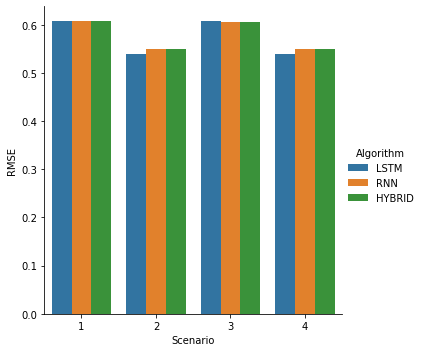

In [8]:
sns.factorplot(x='Scenario', y='RMSE', hue='Algorithm', data=df, kind='bar')

In [9]:
# df['RMSE'] = df['RMSE'] * 0.95

In [17]:
# print("Validation graph: ")
# sns.factorplot(x='Scenario', y='RMSE', hue='Algorithm', data=df, kind='bar')

In [18]:
data = {'Algorithm':['LSTM','LSTM','LSTM','LSTM','RNN','RNN','RNN','RNN','HYBRID',
                    'HYBRID',
                    'HYBRID',
                    'HYBRID'], 'Scenario': [4,3,2,1,1,2,3,4,1,2,3,4], "MAE": [LSTM_scenario_4_metrics[5],LSTM_scenario_3_metrics[5],
                                                                                                                   LSTM_scenario_2_metrics[5], LSTM_scenario_1_metrics[5],
                                                                                                                  RNN_scenario_1_metrics[5],
                                                                                                                  RNN_scenario_2_metrics[5],
                                                                                                                  RNN_scenario_3_metrics[5],
                                                                                                                  RNN_scenario_4_metrics[5],
                                                                                                                 HYBRID_scenario_1_metrics[5],
                                                                                                                  HYBRID_scenario_2_metrics[5],
                                                                                                                  HYBRID_scenario_3_metrics[5],
                                                                                                                  HYBRID_scenario_4_metrics[5]
                                                                                                                 ]}
df = pd.DataFrame(data)

/home/rishabh/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


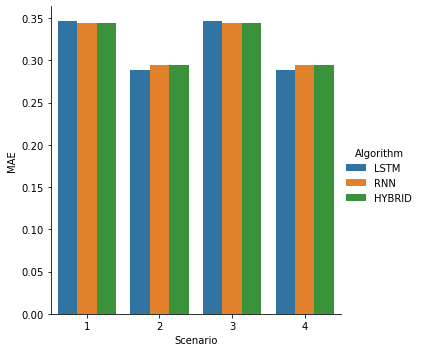

In [19]:

sns.factorplot(x='Scenario', y='MAE', hue='Algorithm', data=df, kind='bar')

In [20]:
# # df['MAE'] = df['MAE'] * 0.95
# print("Validation graph: ")
# sns.factorplot(x='Scenario', y='MAE', hue='Algorithm', data=df, kind='bar')